# Data Exploratory Analysis

Now that the data is in a format that allows for easier and better analysis, its time to start looking at it to see if it makes sense, see how the variables behave, what kind of distributions they show, and how different subsets of the database look.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The pd.describe() function is very useful in this step of data analysis because it concisely summarizes minimum, maximum, average, deviation, quartiles, and deviation. While that information alone does not get into much detail, it is very useful to get a quick glimpse at the data.

In [2]:
data = pd.read_csv("niceData.csv")
data.describe()

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.403846,27.608974,5.335256,22.273718,0.083333,171.653077,0.692308,63.581410,21.488921,0.442308,...,1.326923,1.192308,5.025641,7.083333,3.602564,6.128205,5.459936,2.057692,-0.955128,1.423077
std,0.492248,8.251353,5.479002,6.624910,0.277276,9.749309,2.965643,10.273095,2.251519,0.498260,...,0.951491,1.164615,4.051202,4.734170,3.441079,4.661051,4.089177,1.846498,1.829306,1.353793
min,0.000000,15.000000,0.500000,10.000000,0.000000,150.000000,-10.000000,40.000000,16.003658,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,0.000000,22.000000,2.000000,19.000000,0.000000,164.000000,0.000000,56.000000,20.010952,0.000000,...,1.000000,0.000000,1.000000,3.000000,0.750000,2.000000,2.000000,0.000000,-2.000000,0.000000
50%,0.000000,25.000000,3.750000,21.000000,0.000000,170.000000,0.000000,63.000000,21.258503,0.000000,...,1.000000,1.000000,5.000000,8.000000,3.000000,6.000000,5.500000,2.000000,-0.500000,1.000000
75%,1.000000,30.250000,6.000000,24.125000,0.000000,179.000000,0.000000,70.000000,22.796824,1.000000,...,2.000000,2.000000,8.000000,10.000000,6.000000,9.000000,8.312500,3.000000,0.000000,3.000000
max,1.000000,58.000000,31.000000,53.000000,1.000000,208.000000,13.000000,108.000000,27.777778,1.000000,...,6.000000,7.000000,21.000000,21.000000,20.000000,22.000000,21.000000,8.000000,3.000000,5.000000


## Views

However, describe() by itself might end up showing too much and too varied information, and that can be overwhelming, so one way to use it better is using specific views which focuses on certain types of data. For this example lets create several views with just a few variables each:

In [3]:
#View to see a general profile of the climber
profileVars = ["AGE","YRS_CLIMBING","START_AGE","HEIGHT","WEIGHT",
               "CLIMBDAYS","TRAVEL","VACATIONS","PROJECTING","B_AVG","S_AVG"]
#View regarding how much they train and project
trainProjVars = ["CLIMBDAYS","INDOORDAYS","TRAINDAYS","TOTALTRAIN","TRAINLENGTH",
                 "ATTEMPTS","BESTGO","PROJECTING","B_AVG","S_AVG"]
#View regarding how they train
trainHowVars = ["TRAIN_NA","TRAIN_COACH","TRAIN_BOOK","TRAIN_SELF","TRAIN_RANDOM","TRAIN_CLIMB"]
#View regarding the facilities in the gyms they use
gymVars = ["FAC_BOULDER","FAC_LEAD","FAC_TOP","FAC_AUTO",
           "FAC_BOARDS","FAC_MOON","FAC_GYM"]
#View regarding their focu during training
focusVars = ["FOCUS_FINGER","FOCUS_FOOT","FOCUS_CORE","FOCUS_END","FOCUS_POW",
             "FOCUS_SEQ","FOCUS_DIFF","FOCUS_CARDIO","FOCUS_FLEX","FOCUS_EXPLO"]
#View regarding what they do before climbing
routineVars = ["PREB_WARM","PREB_EASY","PREB_HARD",
               "PRES_WARM","PRES_EASY","PRES_HARD"]
#View regarding bouldering performance
boulderVars = ["B_INFLASH","B_INREDP","B_OUTFLASH","B_OUTREDP","B_FLASHCONF",
               "B_SENDCOF","B_AVG","B_INPOTENTIAL","B_OUTPOTENTIAL"]
#View regarding sports clibing performance
sportsVars = ["S_FLASH","S_REDP","S_FLASHCONF", "S_FINISHCONF","S_AVG",
              "S_FPOTENTIAL","S_MPOTENTIAL","S_INCONSISTENCY"]

In [4]:
data.loc[:,profileVars].describe()

,AGE,YRS_CLIMBING,START_AGE,HEIGHT,WEIGHT,CLIMBDAYS,TRAVEL,VACATIONS,PROJECTING,B_AVG,S_AVG
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,27.608974,5.335256,22.273718,171.653077,63.581410,2.75641,4.884615,1.352564,0.961538,3.717949,5.459936
std,8.251353,5.479002,6.624910,9.749309,10.273095,1.18796,6.493631,0.825438,0.769454,1.936965,4.089177
min,15.000000,0.500000,10.000000,150.000000,40.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,19.000000,164.000000,56.000000,2.00000,1.000000,1.000000,0.000000,2.500000,2.000000
50%,25.000000,3.750000,21.000000,170.000000,63.000000,3.00000,2.000000,1.000000,1.000000,3.500000,5.500000
75%,30.250000,6.000000,24.125000,179.000000,70.000000,3.00000,6.000000,2.000000,2.000000,4.833333,8.312500
max,58.000000,31.000000,53.000000,208.000000,108.000000,6.00000,20.000000,3.000000,2.000000,10.333333,21.000000


Now that we have these views we can take a quick glimpse just at the variables that we care at a given moment. From the view avobe we can start attempting to define the "average" climber. From the looks of it, the average climber...

-  is around 27 years old, 
-  has been climbing for around 5 years
-  is around 171 cm tall
-  weights around 64 kg
-  climbs two or three days a week
-  would climb outside of their city around 5 times a year
-  would have some climbing (but not exclusively climbing) if they went on vacations
-  mildly projects (would project if he went to the same crag by chance)
-  climbs around V4 and around 11a/6b+

Whenever you look at a database for the first time, you need to make sure it makes sense, and that the data is trustworthy. When you are not an expert in the data you are analyzing you either require to use more complex statistical measures, or consult with domain experts to verify for validity. In this case, I happen to be a rock climiber so I have knowledge about the data that I am looking at, and based on my experience this does seem to make sense and to describe an average rock climber, so I would say that the data is trustworthy and would give a green light to continue working with it.

Looking at particular information regarding extremes (min/max) we can get a better idea if there is "bad" data

-  youngest climber is 15 y/o, 
-  youngest start was at 10 years old, 
-  min height is 1.5 meters and 40 kg
-  climb V0 and 5.8 / Fr(5) or lower

All of these are quite plausible, however looking at the max there are some very slight concerns...

- oldest climber is 58 y/o
- longest climber has been climbing 31 yrs
- oldest start was at 53 y/o
- max 2.08m and 108kg
- would climb abroad over 20 times in a year
- climbs around V10 and around 14d/9a

All of theme are quite plausible as well, however, from domain knowledge I know that 9a climbers are not abundant at all in the climbing world, so while it might be true, it would pretty much have to be a professional climber, and given the scope of this survey (around 150 online volunteer random respondants, from all around the world) I don't know how likely it is that a pro-climber would answer this informal survey. The data is still possible and valid, thus i will not discard it, but it is good to have in mind its implications.

So now that we have green-lighted the data, we can start looking into more specific views...

In [5]:
data.loc[:,boulderVars].describe()

,B_INFLASH,B_INREDP,B_OUTFLASH,B_OUTREDP,B_FLASHCONF,B_SENDCOF,B_AVG,B_INPOTENTIAL,B_OUTPOTENTIAL
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,3.961538,5.288462,2.608974,3.801282,2.846154,3.801282,3.717949,1.326923,1.192308
std,1.970376,2.314079,2.068422,2.684291,1.749300,2.089667,1.936965,0.951491,1.164615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,2.000000,2.000000,3.000000,2.500000,1.000000,0.000000
50%,4.000000,5.000000,2.000000,4.000000,3.000000,4.000000,3.500000,1.000000,1.000000
75%,5.000000,7.000000,4.000000,5.000000,4.000000,5.000000,4.833333,2.000000,2.000000
max,11.000000,12.000000,10.000000,11.000000,11.000000,11.000000,10.333333,6.000000,7.000000


In [6]:
data.loc[:,sportsVars].describe()

,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.025641,7.083333,3.602564,6.128205,5.459936,2.057692,-0.955128,1.423077
std,4.051202,4.734170,3.441079,4.661051,4.089177,1.846498,1.829306,1.353793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,1.000000,3.000000,0.750000,2.000000,2.000000,0.000000,-2.000000,0.000000
50%,5.000000,8.000000,3.000000,6.000000,5.500000,2.000000,-0.500000,1.000000
75%,8.000000,10.000000,6.000000,9.000000,8.312500,3.000000,0.000000,3.000000
max,21.000000,21.000000,20.000000,22.000000,21.000000,8.000000,3.000000,5.000000


In [7]:
#Grades for reference
boulders = {"V0":0, "V1":1, "V2":2, "V3":3, "V4":4, "V5":5, "V6":6, "V7":7, "V8":8, "V9":9,
         "V10":10, "V11":11, "V12":12, "V13":13, "V14":14, "V15":15, "V16":16}
routes = {"5.8 / Fr(5) or lower":0, "5.9 / 6a":1, 
          "5.10a / 6a+":2, "5.10b / 6a+":3, "5.10c / 6b":4, "5.10d / 6b+":5,
          "5.11a / 6b+":6, "5.11b / 6c":7, "5.11c / 6c+":8, "5.11d / 7a":9,
          "5.12a / 7a+":10, "5.12b / 7b":11, "5.12c / 7b+":12, "5.12d / 7c":13,
          "5.13a / 7c+":14, "5.13b / 8a":15, "5.13c / 8a+":16, "5.13d /8b":17,
          "5.14a / 8b+":18, "5.14b / 8c":19, "5.14c / 8c+":20, "5.14d / 9a":21,
          "5.15a / 9a+":22, "5.15b / 9b":23, "5.15c / 9b+":24, "5.15d / 9c":25}

## Outlier analysis

Looking at performance data, the boudler data looks very good, however, looking at the sports data we can see that the 9a climber mentioned before claims to have flashed/onsighted that 9a. There are currently only 2 climbers in the world that can onsight/flash that grade, and I am pretty confident neither of them answered this survey, so I will deem this registry faulty and proceed to delete it to remove noise.

Right now we did it manually, but another way to visualize outliers is to plot the data. As seen below, jumps between one climber group and the next is by 1 or 2 grades max, but that single climber had a 6 grade jump, which is very unlikely.

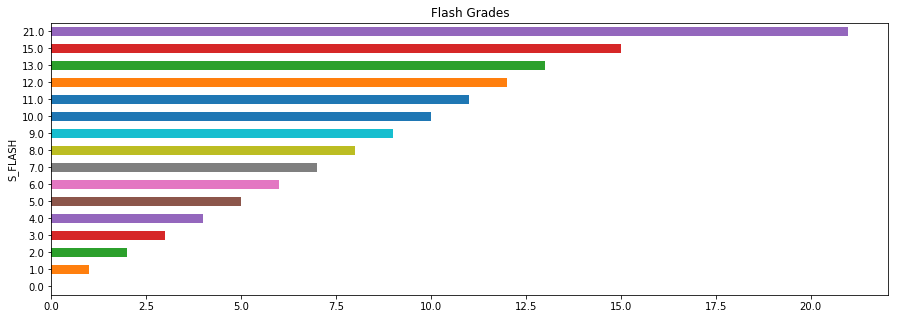

In [8]:
plot = data.groupby("S_FLASH")["S_FLASH"].mean().sort_values().plot.barh(title="Flash Grades",figsize=(15, 5))

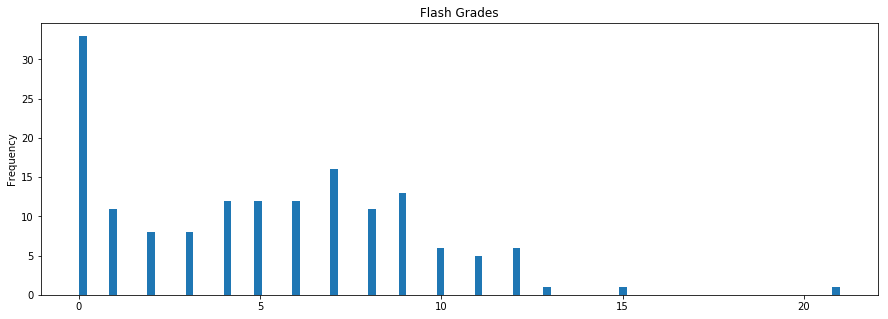

In [9]:
plot = data["S_FLASH"].plot.hist(bins = 100,title="Flash Grades",figsize=(15, 5))

In [10]:
data = data.drop(data['S_FLASH'].idxmax())
data.loc[:,sportsVars].describe()

,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,4.922581,6.993548,3.496774,6.025806,5.359677,2.070968,-0.967742,1.425806
std,3.853714,4.614343,3.187586,4.496678,3.905341,1.844999,1.828417,1.357750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,1.000000,3.000000,0.500000,2.000000,2.000000,0.000000,-2.000000,0.000000
50%,5.000000,8.000000,3.000000,6.000000,5.500000,2.000000,-1.000000,1.000000
75%,8.000000,10.000000,6.000000,9.000000,8.250000,3.000000,0.000000,3.000000
max,15.000000,18.000000,12.000000,17.000000,15.250000,8.000000,3.000000,5.000000


After removing that single registry, now the data looks much better. That climber was like 6 grades above the next climber of the list. This process to some might seem like forcing the data to look how you expect it to look, but it actually is a very common practice in Data Science.

When dealing with large datasets, there will be many times when some values of the data will be too low or too high to be real or make any sense, this specific cases are called "outliers". In this excercise the dataset is quite small and the Data Scientist happens to have domain knowledge of the data to be able to manually deal with outliers. However this usually won't be the case, datasets normally will either be too big to take a proper look at particular registries to validate them, or the scientist won't have domain knowledge in order to validate the data. 

In order to deal with outliers in bigger datasets, one would normally remove the bottom and top 1 or 2% (or everything above or below a certain number of standard deviations) of the data just to assure the removal of outliers.

## General overview

Now we can proceed to look at the rest of the views just to notice generalities in the data.

In [ ]:
plot = data[gymVars].mean().plot.bar(title="Average Gym Facilities",figsize=(15, 5))

In [ ]:
plot = data[focusVars].mean().plot.bar(title="Average Training Focus",figsize=(15, 5))

In [ ]:
plot = data[trainProjVars].mean().plot.bar(title="Train and climb",figsize=(15, 5))

In [ ]:
plot = data[trainHowVars].mean().plot.bar(title="Type of training",figsize=(15, 5))

In [ ]:
plot = data[routineVars].mean().plot.bar(title="Climb Routine",figsize=(15, 5))